# Object 1: Jean, Tori, Alex, Mark

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.coordinates as coord
import astropy.units as u
import astropy.constants as const
%matplotlib inline

In [6]:
data = np.genfromtxt('obj1.data', dtype=None, names=True)
ID = data['ID']
RA = data['RAJ2000']
DEC = data['DECJ2000']
Z = data['Z']
E_Z = data['E_Z']
V = Z*(const.c.to('km/s'))

(0.0, 0.8)

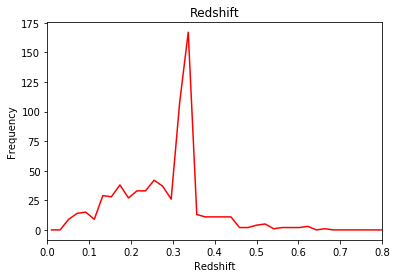

In [53]:
z_hist, bins = np.histogram(Z, bins=np.linspace(0,1,50))
plt.plot((bins[1:]+bins[:-1])/2., z_hist, c = 'r')
plt.xlabel("Redshift")
plt.ylabel("Frequency")
plt.title("Redshift")
plt.xlim(0.0, 0.8)

In [56]:
z_mode = bins[np.argmax(vel_hist)]

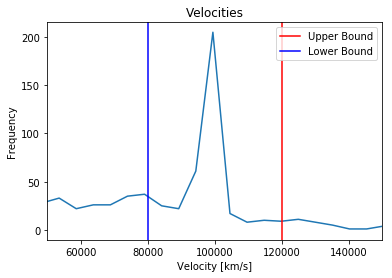

In [57]:
vel_hist, bins = np.histogram(V, bins=np.linspace(0,2.5e5,50))
plt.plot((bins[1:]+bins[:-1])/2., vel_hist)
plt.xlabel("Velocity [km/s]")
plt.ylabel("Frequency")
plt.title("Velocities")
plt.xlim(5e4, 15e4)
plt.axvline(1e5 + 2e4, c= 'r', label = 'Upper Bound')
plt.axvline(1e5 - 2e4, c = 'b', label = 'Lower Bound')
plt.legend()

In [67]:
velocity_disp = np.std(V[np.abs(V.value-1e5)<2e4])
print('Velocity Dispersion = {}'.format(velocity_disp))

Velocity Dispersion = 6724.32012073595 km / s


In [64]:
RA_range = (max(RA)-min(RA)) * u.degree
DEC_range = (max(DEC)-min(DEC)) * u.degree
RA_real = RA_range.to(u.rad)
DEC_real = DEC_range.to(u.rad)

theta = np.sqrt(RA_real**2 + DEC_real**2)

print('Angular Size = {}'.format(theta))

Angular Size= 0.007575429814877227 rad


In [70]:
H_naught = 70 * u.km / u.s / u.Mpc
v_mode = z_mode * (const.c.to('km/s'))

dist = v_mode / H_naught
a = (1+z_mode)**2*theta*(dist) /u.rad

print('Distance = {}'.format(dist))
print('Actual Size = {}'.format(a))

Distance = 1660.6579306122449 Mpc
Actual Size = 24.227752478887794 Mpc


In [74]:
mass = 930 * (velocity_disp/(u.km)*(u.s))**2 * (a.to(u.pc)/u.pc) *u.M_sun
print('Mass = {}'.format(mass))

Mass = 1.018809151900692e+18 solMass


This mass calculation may be off.  The Wolf et al. paper that we took this equation from implicitly dealt only with galaxies.

# We believe that this object is a galaxy cluster, based mostly on its velocity dispersion and size.